<a href="https://colab.research.google.com/github/chalika-vanyaa/Image_Classification_Model/blob/main/Chalika_Vanya_Resya_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Klasifikasi Gambar: Brain Tumor MRI Dataset**
- **Nama:** Chalika Vanya Resya
- **Email:** chalikavanya@gmail.com
- **ID Dicoding:** chalikavanyaa

## **Import Libraries**

In [ ]:
# commonly used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
import zipfile
import random

from random import sample
from shutil import copyfile
from pathlib import Path
from tqdm.notebook import tqdm as tq

# libraries used for image classification
import cv2
from PIL import Image
import skimage
from skimage import io, img_as_ubyte
from skimage.transform import resize, rotate, AffineTransform, warp
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# libraries used to create model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import keras
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

!pip install tensorflowjs
import tensorflowjs as tfjs

from google.colab import files

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print(tf.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 30.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


2.18.0


In [ ]:
# requirements.txt
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.4
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.2.24.0.34.4
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.1.1
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.

## **About Dataset**

```
This dataset consists of 7.023 human brain MRI images (before preprocessing) that are classified into 4 classes:
*   Glioma
*   Meningioma
*   Pituitary
*   No Tumor

Objective: to classify brain MRI images into four categories:3 representing different types of brain tumor and the
other indicates the absence of a tumor.
This classification is performed using a CNN (Convolutional Neural Network) model.

Additional info: some images in the dataset have varying resolutions, hence introducing some variability in the data.
```

Source:
[Brain Tumor MRI Kaggle Dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data)

## **Data Loading**

In [ ]:
# upload files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chalikavanya","key":"371690c3d49fa0c3c7aba4115c31641b"}'}

In [ ]:
# download kaggle dataset and unzip the files
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

## **Data Preparation**

In [ ]:
# defining initial directories for both training and testing data
train_dir = '/content/Testing'
test_dir = '/content/Training'

# defining the directory for combined dataset
combined_dir = '/content/Combined'

# creating new directory for combined dataset
os.makedirs(combined_dir, exist_ok=True)

In [ ]:
# function to copy files and folders from one location to the other
def copy_file_folder(source_dir, combined_dir):
  for category in os.listdir(source_dir):
    cat_dir = os.path.join(source_dir, category)
    # if path refers to existing directory
    if os.path.isdir(cat_dir):
      shutil.copytree(cat_dir,
                      os.path.join(combined_dir, category), # copying file and folders
                      dirs_exist_ok=True # making sure copying process works as expected
                      )

# function call
copy_file_folder(train_dir, combined_dir) # train directory
copy_file_folder(test_dir, combined_dir) # test directory

## **Dataset Checking**

### **Image Plot**

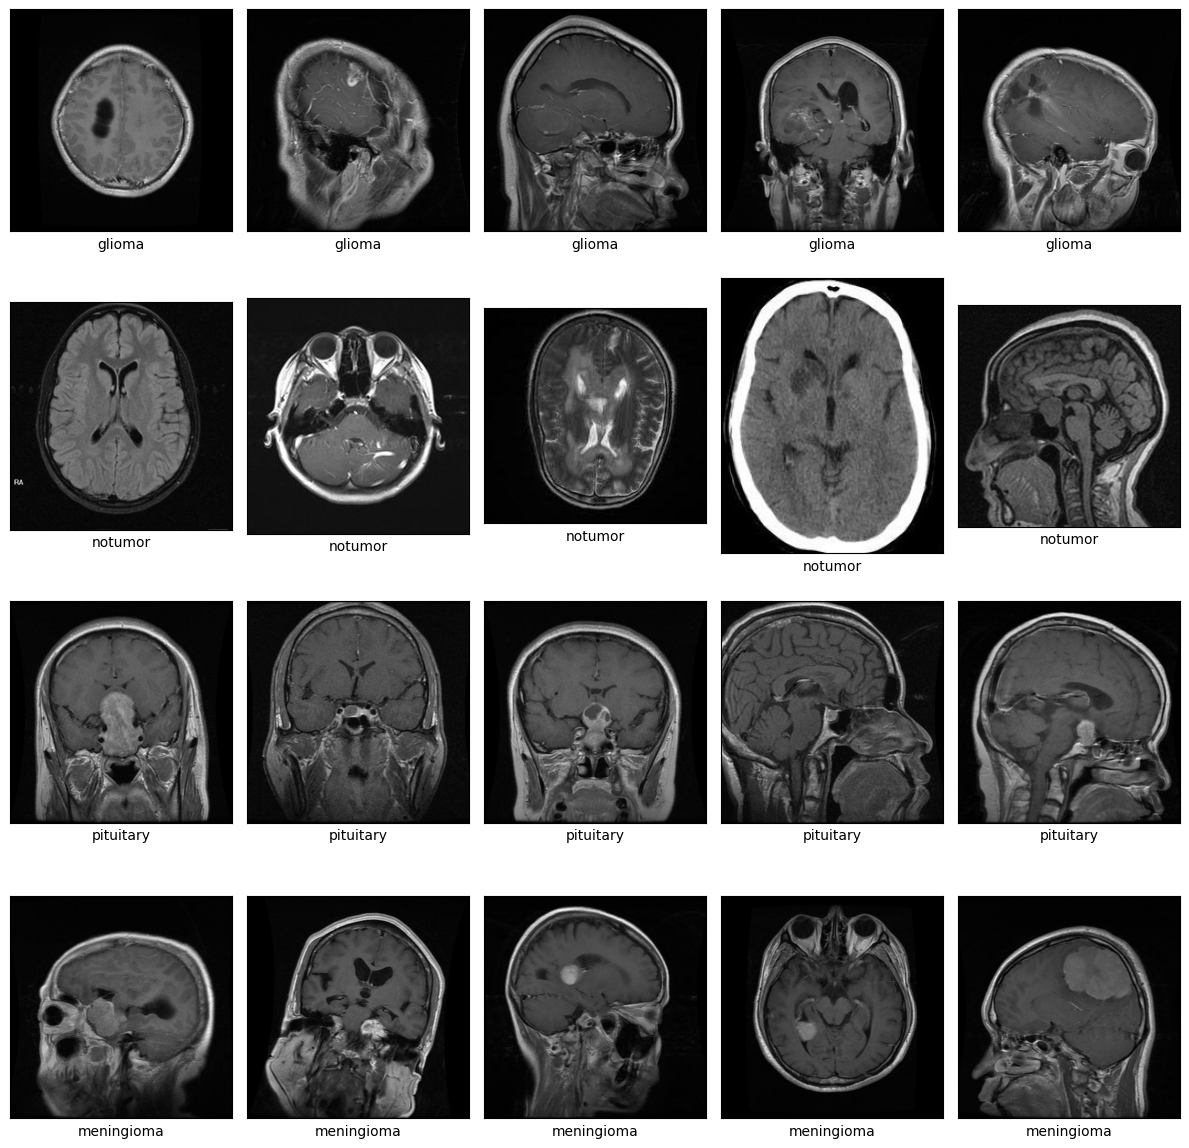

In [ ]:
brain_img = dict() # a dictionary to store images from each class

# define the path
path = '/content/'
brain_combined_path = os.path.join(path, 'Combined')

# adding the images to the dictionary
for i in os.listdir(brain_combined_path):
  brain_img[i] = os.listdir(os.path.join(brain_combined_path, i))

# image plot
fig, axes = plt.subplots(len(brain_img.keys()), 5, figsize=(12,12))

for i, class_name in enumerate(os.listdir(brain_combined_path)):
  random_imgs = np.random.choice(brain_img[class_name], 5, replace=False) # randomly choosing 5 images from each class

  for j, img_name in enumerate(random_imgs):
    img_path = os.path.join(brain_combined_path, class_name, img_name)
    img = Image.open(img_path).convert('L') # converting image scale to grayscale
    axes[i, j].imshow(img, cmap='gray')
    axes[i, j].set(
      xlabel=class_name,
      xticks=[],
      yticks=[]
    )

fig.tight_layout()

> Kode di atas menampilkan lima gambar berbeda dari setiap kelas. Terlihat bahwa beberapa di antaranya memiliki ukuran gambar yang berbeda. Hal ini menambahkan variasi data yang dapat membantu model untuk belajar terhadap berbagai karakteristik setiap kelas sehingga membantu model untuk bisa melakukan generalisasi data dengan lebih baik.

### **Distribution Plot**

In [ ]:
# function to store each file name, path, and label into respective lists
def add_data_to_list(dataset_path, list_name, list_path, list_label):
  for path, subdirs, files in os.walk(dataset_path):
    for name in files:
      list_name.append(name) # file names
      list_path.append(os.path.join(path, name)) # image path

      # image label
      label = path.split('/')[-1].replace('_augmented', '')
      list_label.append(label)
  return list_name, list_path, list_label

In [ ]:
# empty lists to store file names, paths, and labels
file_name = []
file_path = []
labels = []

# function call
file_name, file_path, labels = add_data_to_list(brain_combined_path, file_name, file_path, labels)

# storing all data into a dataframe
combined_data_train = pd.DataFrame({
    'path': file_path,
    'file_name': file_name,
    'label': labels
})

# display the data
combined_data_train

,path,file_name,label
0,/content/Combined/glioma/Tr-gl_1202.jpg,Tr-gl_1202.jpg,glioma
1,/content/Combined/glioma/Tr-gl_0999.jpg,Tr-gl_0999.jpg,glioma
2,/content/Combined/glioma/Tr-gl_0442.jpg,Tr-gl_0442.jpg,glioma
3,/content/Combined/glioma/Tr-gl_0705.jpg,Tr-gl_0705.jpg,glioma
4,/content/Combined/glioma/Tr-gl_0314.jpg,Tr-gl_0314.jpg,glioma
...,...,...,...
7018,/content/Combined/meningioma/Te-me_0119.jpg,Te-me_0119.jpg,meningioma
7019,/content/Combined/meningioma/Te-me_0163.jpg,Te-me_0163.jpg,meningioma
7020,/content/Combined/meningioma/Tr-me_1223.jpg,Tr-me_1223.jpg,meningioma
7021,/content/Combined/meningioma/Tr-me_0562.jpg,Tr-me_0562.jpg,meningioma


In [ ]:
# classes distribution
combined_data_train['label'].value_counts()

,count
label,
notumor,2000
pituitary,1757
meningioma,1645
glioma,1621


> Sebelum dilakukan augmentasi data, total data pada dataset adalah sebanyak 7.023 sampel yang terbagi ke dalam masing-masing kelas, seperti yang terlihat pada distribusi di atas. Augmentasi data dilakukan untuk meningkatkan jumlah sampel pada setiap kelas, dengan target setiap kelas memiliki 3.000 sampel masing-masingnya. Dengan demikian, total data pada dataset setelah proses augmentasi akan menjadi 12.000 sampel.

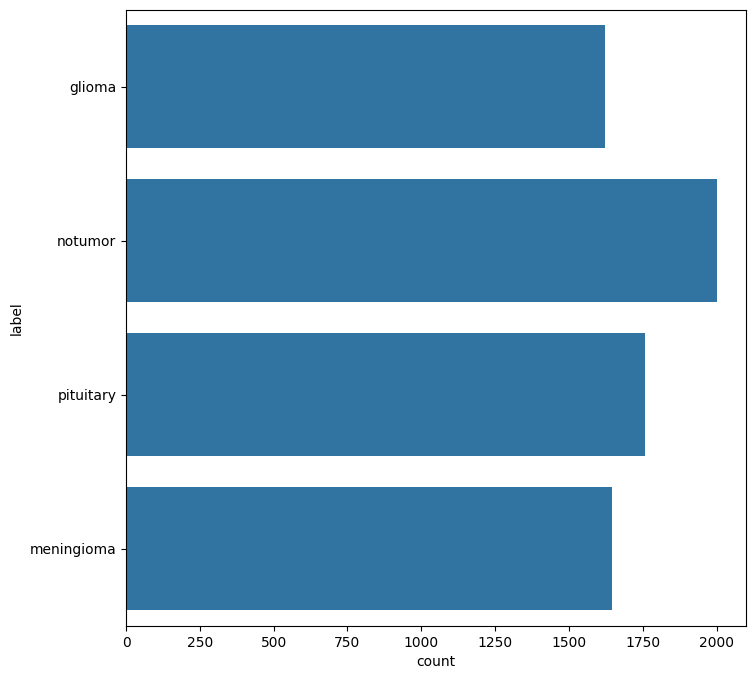

In [ ]:
# data distribution plot
image_label = combined_data_train['label']
plt.figure(figsize=(8,8))
plt.axis(True)
count_plot = sns.countplot(image_label)

## **Data Augmentation**

In [ ]:
# transformation class

class ImageTransformation:
  def __init__(self, img):
    self.img = img

  '''
  1. Resize
  '''
  # function to resize image with padding to maintain different image resolutions
  def resize_with_padding(self, target_size=(224,224)):
    return tf.image.resize_with_pad(self.img, target_height=target_size[0], target_width=target_size[1])

  '''
  2. Flip
  '''
  # function to do vertical flip
  def flip_vertical(self):
    img = self.resize_with_padding()
    return tf.image.flip_up_down(img)

  # function to do horizontal flip
  def flip_horizontal(self):
    img = self.resize_with_padding()
    return tf.image.flip_left_right(img)

  '''
  3. Rotation
  '''
  # function to randomly rotate image by 90, 180, or 270 degree angle
  def rotate_image(self):
    img = self.resize_with_padding()
    return tf.image.rot90(img, k=random.randint(1,3))

  '''
  4. Blur
  '''
  # function to add blur to images
  def add_blur(self):
    img = self.resize_with_padding()
    img = tf.image.convert_image_dtype(img, dtype=tf.uint8) # converting tf tensor to uint8 for compatibility using OpenCV
    img_np = img.numpy() # converting tf tensor to numpy array
    img_blurred = cv2.GaussianBlur(img_np, (3,3), 0) # apply blur
    return tf.convert_to_tensor(img_blurred, dtype=tf.float32) # converting image array back to tf tensor
  '''
  5. Brightness
  '''
  # function to adjust images' brightness
  def add_brightness(self):
    img = self.resize_with_padding()
    return tf.image.adjust_brightness(img, delta=random.uniform(-0.5, 0.5))

  '''
  6. Shear
  '''
  # function to shear images
  def shear_image(self):
    img = self.resize_with_padding()
    data_gen = ImageDataGenerator(shear_range=0.2)
    return next(iter(data_gen.flow(tf.expand_dims(img, 0), batch_size=1)))[0]

  '''
  7. Warp shift
  '''
  # function to warp images
  def warp_image(self):
    img = self.resize_with_padding()
    data_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
    return next(iter(data_gen.flow(tf.expand_dims(img, 0), batch_size=1)))[0]

In [ ]:
# function to check if an image is valid (dimension or range)
def is_valid_image(image):
  # return False if the image dimension is invalid
  if image.ndim not in [3,4]:
    print(f'Skipping image (Invalid Dimensions): {image.shape}')
    return False

  # return False if the image value range for type float is not [0,1]
  if image.dtype in [np.float32, np.float64]:
    if image.min() < 0 or image.max() > 1:
      print(f'Skipping image (Invalid Value Range): [{image.min()}, {image.max()}]')
      return False

  return True

In [ ]:
# function to augment data for every class
def augment_data(label, total_img_to_generate, verbose=True):
  # define paths for original and augmented data
  original_path = f'/content/Combined/{label}'
  augmented_path = f'/content/Combined/{label}_augmented'

  # ensure the folder to store augmented data exists and create one if none
  os.makedirs(augmented_path, exist_ok=True)

  # set of existing augmented images
  existing_aug_imgs = set(os.listdir(augmented_path))

  # list of valid images' path
  preprocessed_imgs = []

  # load and validate images
  for img in os.listdir(original_path):
    image_path = os.path.join(original_path, img)
    try:
      original_img = io.imread(image_path)
      # check image validity and only append to list if valid
      if is_valid_image(original_img):
        preprocessed_imgs.append(image_path)
    except Exception as e:
      print(f'Failed to process the image {image_path}. Error: {e}')

  # skip augmentation if no valid images found
  if not preprocessed_imgs:
    print(f'No valid images found for label {label}. Skipping the augmentation process.')
    return

  # data augmentation process until the desired number of images to be generated
  i = 1
  while i <= total_img_to_generate:
    new_img_name = f'augmented_image_{label}_{i}.jpg'

    # skip if the image already exists
    if new_img_name in existing_aug_imgs:
      print(f'{new_img_name} already exists hence skipping it.')
      i += 1
      continue

    image = random.choice(preprocessed_imgs) # randomly choosing existing image

    try:
      # read the image
      original_img = io.imread(image)

      # normalize and convert the image format to Tensorflow tensor to apply transformations
      original_img = tf.convert_to_tensor(original_img / 255.0, dtype=tf.float32)

      # define transformations
      imageTransformation = ImageTransformation(original_img)
      transformations = {
          'random rotation': imageTransformation.rotate_image,
          'vertical flip': imageTransformation.flip_vertical,
          'horizontal flip': imageTransformation.flip_horizontal,
          'blur image': imageTransformation.add_blur,
          'add brightness': imageTransformation.add_brightness,
          'shear image': imageTransformation.shear_image,
          'warp image': imageTransformation.warp_image
      }

      # randomly select the sequence of the transformation steps
      transformation_steps = random.randint(1, len(transformations))

      # apply transformations to the image
      transformed_img = original_img
      for _ in range(transformation_steps):
        key = random.choice(list(transformations.keys()))
        transformed_img = transformations[key]()

      # reconvert the image format to numpy
      if isinstance(transformed_img, tf.Tensor):
        transformed_img = transformed_img.numpy()

      # convert format to uint and RGB to BGR for OpenCV compatibility
      transformed_img = (transformed_img * 255).astype(np.uint8)
      transformed_img = cv2.cvtColor(transformed_img, cv2.COLOR_RGB2BGR)

      # save the augmented image
      new_img_path = os.path.join(augmented_path, new_img_name)
      cv2.imwrite(new_img_path, transformed_img)

      # print progress
      if verbose:
        progress = (i / total_img_to_generate) * 100
        print(f'{new_img_name} saved successfully. ({i}/{total_img_to_generate}, {progress:.2f}% completed)')

      i += 1 # continue to the next image

    except Exception as e:
      print(f'Failed to process the image {image}. Error: {e}')

In [ ]:
# function call
augment_data('glioma', 1379)
augment_data('meningioma', 1355)
augment_data('pituitary', 1243)
augment_data('notumor', 1000)

Streaming output truncated to the last 5000 lines.
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): (512, 512)
Skipping image (Invalid Dimensions): 

In [ ]:
# creating a new dataframe with both original and augmented images
file_name = []
file_path = []
labels = []

# function call
file_name, file_path, labels = add_data_to_list(brain_combined_path, file_name, file_path, labels)

# storing all data into a dataframe
train_preprocessed = pd.DataFrame({
    'path': file_path,
    'file_name': file_name,
    'label': labels
})

# display the data
train_preprocessed

,path,file_name,label
0,/content/Combined/glioma_augmented/augmented_i...,augmented_image_glioma_421.jpg,glioma
1,/content/Combined/glioma_augmented/augmented_i...,augmented_image_glioma_807.jpg,glioma
2,/content/Combined/glioma_augmented/augmented_i...,augmented_image_glioma_74.jpg,glioma
3,/content/Combined/glioma_augmented/augmented_i...,augmented_image_glioma_224.jpg,glioma
4,/content/Combined/glioma_augmented/augmented_i...,augmented_image_glioma_123.jpg,glioma
...,...,...,...
11995,/content/Combined/pituitary_augmented/augmente...,augmented_image_pituitary_683.jpg,pituitary
11996,/content/Combined/pituitary_augmented/augmente...,augmented_image_pituitary_436.jpg,pituitary
11997,/content/Combined/pituitary_augmented/augmente...,augmented_image_pituitary_1144.jpg,pituitary
11998,/content/Combined/pituitary_augmented/augmente...,augmented_image_pituitary_927.jpg,pituitary


In [ ]:
# recheck the classes distribution proportion
train_preprocessed['label'].value_counts()

,count
label,
glioma,3000
notumor,3000
pituitary,3000
meningioma,3000


> Proses augmentasi data di atas mencakup beberapa tahapan transformasi yang dipilih secara acak. Tahapan tersebut di antaranya adalah:
- `rotate_image`: melakukan rotasi acak (searah atau berlawanan arah jarum jam),
- `flip_vertical`: membalik gambar secara vertikal,
- `flip_horizontal`: membalik gambar secara horizontal,
- `add_brightness`: menambahkan efek peningkatan kecerahan,
- `add_blur`: menambahkan efek blur,
- `warp_image`: menambahkan efek pergeseran melengkung,
- `shear_image`: menambahkan efek pergeseran acak.

> Berbagai tahapan ini dilakukan untuk menambahkan keragaman data sehingga meningkatkan kemampuan model dalam menggeneralisasi data serta ketahanan model terhadap berbagai variasi gambar yang ada di dunia nyata. Hasil augmentasi di atas juga diatur agar setiap target memiliki total 3.000 sampel. Hal ini dilakukan untuk memastikan keseimbangan data antarkelas sehingga tidak terjadi bias terhadap kelas tertentu saja.


## **Data Splitting**

In [ ]:
# separate variable X and y
X = train_preprocessed['path']
y = train_preprocessed['label']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # 90:10 ratio

In [ ]:
# create dataframe to store train set and test set
df_train = pd.DataFrame({'path': X_train, 'label': y_train, 'set': 'train'})
df_test = pd.DataFrame({'path': X_test, 'label': y_test, 'set': 'test'})

# display the size of each dataframe
print(f'Train size: {df_train.shape[0]}')
print(f'Test size: {df_test.shape[0]}')

Train size: 10800
Test size: 1200


> Pembagian data dilakukan dengan rasio 90:10, di mana 90% data digunakan sebagai data pelatihan (*training set*) dan 10% data sisanya akan menjadi bagian data uji (*testing set*). Pembagian dengan rasio ini dilakukan untuk memastikan data dapat belajar dengan jumlah data yang cukup banyak sehingga dapat mencegah kemungkinan *overfitting*.


In [ ]:
# concatenate both train and test dataframes for further analysis
df = pd.concat([df_train, df_test], ignore_index=True)

# display 10 samples
df.sample(10)

,path,label,set
2279,/content/Combined/meningioma/Tr-me_0078.jpg,meningioma,train
11690,/content/Combined/glioma_augmented/augmented_i...,glioma,test
7639,/content/Combined/notumor/Tr-no_0861.jpg,notumor,train
1199,/content/Combined/notumor/Tr-no_0150.jpg,notumor,train
219,/content/Combined/notumor/Te-no_0099.jpg,notumor,train
10673,/content/Combined/glioma/Tr-gl_0436.jpg,glioma,train
11770,/content/Combined/glioma/Te-gl_0186.jpg,glioma,test
4675,/content/Combined/glioma/Tr-gl_0954.jpg,glioma,train
1770,/content/Combined/pituitary/Te-pi_0151.jpg,pituitary,train
1322,/content/Combined/notumor/Tr-no_0018.jpg,notumor,train


In [ ]:
# display label distribution in each set
df.groupby(['set', 'label']).size()

set    label     
test   glioma         298
       meningioma     301
       notumor        311
       pituitary      290
train  glioma        2702
       meningioma    2699
       notumor       2689
       pituitary     2710
dtype: int64

In [ ]:
# define the path of the original directory
source_path = '/content/Combined/'

# define the path of the directory to store data after splitting
final_path = '/content/Final_Dataset/'

In [ ]:
# loop over dataset entries
for idx, row in tq(df.iterrows()):
  # detect file path
  file_path = row['path']
  if not os.path.exists(file_path):
    file_path = os.path.join(source_path, row['label'], row['image'].split('.')[0] )

  # create destination directory
  if not os.path.exists(os.path.join(final_path, row['set'], row['label'])):
    os.makedirs(os.path.join(final_path, row['set'], row['label']))

  # set destination path
  destination_filename = file_path.split('/')[-1]
  file_destination = os.path.join(final_path, row['set'], row['label'], destination_filename)

  # copy files to new directory
  if not os.path.exists(file_destination):
    shutil.copy2(file_path, file_destination)

0it [00:00, ?it/s]

> Kode di atas membuat direktori baru yang akan menyimpan data yang telah diproses sebelumnya. Data tersebut nantinya akan dipisah ke dalam folder sesuai set nya (pelatihan atau uji).

## **Image Data Generator**

In [ ]:
# define train and test path directories
TRAIN_DIR = '/content/Final_Dataset/train/'
TEST_DIR = '/content/Final_Dataset/test/'

# define the directories for each class
train_glioma = os.path.join(TRAIN_DIR + '/glioma')
train_meningioma = os.path.join(TRAIN_DIR + '/meningioma')
train_pituitary = os.path.join(TRAIN_DIR + '/pituitary')
train_notumor = os.path.join(TRAIN_DIR + '/notumor')

test_glioma = os.path.join(TEST_DIR + '/glioma')
test_meningioma = os.path.join(TEST_DIR + '/meningioma')
test_pituitary = os.path.join(TEST_DIR + '/pituitary')
test_notumor = os.path.join(TEST_DIR + '/notumor')

# print the total images in the train and test directories
print("Total number of glioma images in the train set: ", len(os.listdir(train_glioma)))
print("Total number of meningioma images in the train set: ", len(os.listdir(train_meningioma)))
print("Total number of pituitary images in the train set: ", len(os.listdir(train_pituitary)))
print("Total number of no tumor images in the train set: ", len(os.listdir(train_notumor)))
print()
print("Total number of glioma images in the test set: ", len(os.listdir(test_glioma)))
print("Total number of meningioma images in the test set: ", len(os.listdir(test_meningioma)))
print("Total number of pituitary images in the test set: ", len(os.listdir(test_pituitary)))
print("Total number of no tumor images in the test set: ", len(os.listdir(test_notumor)))

Total number of glioma images in the train set:  2702
Total number of meningioma images in the train set:  2699
Total number of pituitary images in the train set:  2710
Total number of no tumor images in the train set:  2689

Total number of glioma images in the test set:  298
Total number of meningioma images in the test set:  301
Total number of pituitary images in the test set:  290
Total number of no tumor images in the test set:  311


In [ ]:
# normalization
data_gen = ImageDataGenerator(rescale=1/255.,
                              validation_split=0.2)

test_data_gen = ImageDataGenerator(rescale=1./255)

# train generator
train_gen = data_gen.flow_from_directory(TRAIN_DIR,
                                         batch_size=32,
                                         target_size=(150,150),
                                         color_mode='grayscale',
                                         class_mode='categorical',
                                         subset='training',
                                         shuffle=True,
                                         seed=42)

# validation generator
validation_gen = data_gen.flow_from_directory(TRAIN_DIR,
                                              batch_size=32,
                                              target_size=(150,150),
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=False,
                                              seed=42)

# test generator
test_gen = test_data_gen.flow_from_directory(TEST_DIR,
                                             batch_size=1,
                                             target_size=(150,150),
                                             color_mode='grayscale',
                                             class_mode='categorical',
                                             shuffle=False)

Found 8642 images belonging to 4 classes.
Found 2158 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


## **Modeling**

### **Functions used**

In [ ]:
# function to compute class weights for multi-class dataset
def class_weight(train_list):
  count_data = []
  # collect the number of images in each class
  for data in train_list:
    count_data.append(len(os.listdir(data)))

  total_count = sum(count_data) # the sum of all images
  num_classes = len(count_data) # total number of classes

  class_weights = dict()

  # compute class weights
  for i, count in enumerate(count_data):
    weight = (1 / count) * (total_count / num_classes)
    class_weights[i] = weight

  return class_weights

# function call
class_weights = class_weight([train_glioma, train_meningioma, train_pituitary, train_notumor])

In [ ]:
# function to plot accuracy and loss side by side
def plot_accuracy_loss(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(accuracy))

  plt.figure(figsize=(12,5))

  # accuracy plot
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy, 'r')
  plt.plot(epochs, val_accuracy, 'b')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend(['train', 'val'], loc='lower right')

  # loss plot
  plt.subplot(1,2,2)
  plt.plot(epochs, loss, 'r')
  plt.plot(epochs, val_loss, 'b')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('Training and Validation Loss')
  plt.legend(['train', 'val'], loc='upper right')

  plt.tight_layout()
  plt.show()

In [ ]:
# function to do model prediction and evaluation
def pred_and_eval(model, test_gen):
  test_gen.reset() # reset test generator

  # prediction
  preds = model.predict(test_gen, verbose=0)
  preds = np.argmax(preds, axis=1)

  # get actual classes from test_gen
  class_names = list(test_gen.class_indices.keys())

  # confusion matrix
  cm = pd.DataFrame(data=confusion_matrix(test_gen.classes, preds),
                    index=[f'Actual {cls}' for cls in class_names],
                    columns=[f'Predicted {cls}' for cls in class_names])
  sns.heatmap(cm, annot=True, fmt='d', cmap='icefire')

  # classification report
  print(classification_report(y_true=test_gen.classes,
                              y_pred=preds,
                              target_names=class_names,
                              digits=4))
  return preds, cm

### **Model Training**

In [ ]:
# callbacks
earlyStopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              restore_best_weights=True,
                              verbose=1)

modelCheckpoint = ModelCheckpoint('best_model.keras',
                                  monitor='val_loss',
                                  mode='min',
                                  save_best_only=True,
                                  verbose=1)

lr_scheduling = ReduceLROnPlateau(monitor='val_loss',
                                  patience=4,
                                  factor=0.5,
                                  min_lr=1e-6)

> Ada tiga jenis *callbacks* yang digunakan dalam pelatihan model:
- **Early Stopping**: memantau metrik `val_loss` dan menghentikan pelatihan jika tidak ada peningkatan selama 5 epoch (`patience=5`). Hal ini dilakukan untuk mencegah *overfitting*.
- **Model Checkpoint**: memantau metrik `val_loss` dan menyimpan model dengan performa terbaik pada setiap epoch untuk bisa digunakan kembali.
- **ReduceLROnPlateau**: mengurangi nilai *learning rate* jika metrik `val_loss` tidak menunjukkan peningkatan dalam beberapa epoch (`patience=4`). Hal ini dapat membantu model untuk beradaptasi dan menghindari stagnasi dalam proses pelatihan.


In [ ]:
# model architecture
model = Sequential([
    # first CNN layer -> 256 neurons
    Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(150,150,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    # second CNN layer -> 128 neurons
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    # third CNN layer -> 64 neurons
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    # flatten layer
    Flatten(),
    # first dense layer -> 256 neurons
    Dense(256, activation='relu'),
    Dropout(0.5),
    # second dense layer -> 128 neurons
    Dense(128, activation='relu'),
    Dropout(0.3),
    # output layer
    Dense(4, activation='softmax') # 4 classes as possible output
])

# model compiling
model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 256)       │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       5,308,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,715,268 (21.80 MB)

 Trainable params: 5,714,372 (21.80 MB)

 Non-trainable params: 896 (3.50 KB)

> Arsitektur model CNN di atas terdiri dari tiga layer konvolusi dengan jumlah neuron secara berurutan adalah 256, 128, dan 64. Proses **Batch Normalization** diterapkan setelah setiap layer konvolusi untuk menyeragamkan distribusi aktivasi untuk membantu model belajar lebih stabil dan cepat. Model kemudian dibangun dengan dua layer Dense dengan neuron 128 dan 64 secara berurutan. Untuk mencegah risiko *overfitting*, teknik **Dropout** juga diimplementasikan pada layer Dense. Terakhir, layer output memiliki 4 neuron dengan aktivasi Softmax karena model ini dibangun untuk mengklasifikasikan gambar ke dalam 4 kelas yang berbeda.

> Pada tahap kompilasi, model menggunakan optimizer `Adam` dengan `learning_rate=0.0001`, fungsi *loss* `categorical_crossentropy`, dan metrik evaluasi berupa akurasi.

In [ ]:
# model training
%time

hist = model.fit(train_gen,
                 epochs=50,
                 batch_size=32,
                 validation_data=validation_gen,
                 class_weight=class_weights,
                 callbacks=[earlyStopping, modelCheckpoint, lr_scheduling],
                 verbose=2)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 5.00365, saving model to best_model.keras
271/271 - 56s - 208ms/step - accuracy: 0.5879 - loss: 1.0937 - val_accuracy: 0.2549 - val_loss: 5.0036 - learning_rate: 1.0000e-04
Epoch 2/50

Epoch 2: val_loss improved from 5.00365 to 1.49197, saving model to best_model.keras
271/271 - 33s - 123ms/step - accuracy: 0.6902 - loss: 0.7872 - val_accuracy: 0.6061 - val_loss: 1.4920 - learning_rate: 1.0000e-04
Epoch 3/50

Epoch 3: val_loss improved from 1.49197 to 0.63754, saving model to best_model.keras
271/271 - 33s - 123ms/step - accuracy: 0.7387 - loss: 0.6670 - val_accuracy: 0.7641 - val_loss: 0.6375 - learning_rate: 1.0000e-04
Epoch 4/50

Epoch 4: val_loss improved from 0.63754 to 0.44255, saving model to best_model.keras
271/271 - 33s - 122ms/step - accuracy: 0.7626 - loss: 0.5889 - val_accuracy: 0.8100 - val_loss: 0.4426 - learning_rate: 1.0000e-04
Epoch 5/50

Epoch 5: val_loss improved from 0.44255 to 0.39531, saving model to best_model.keras
271/27

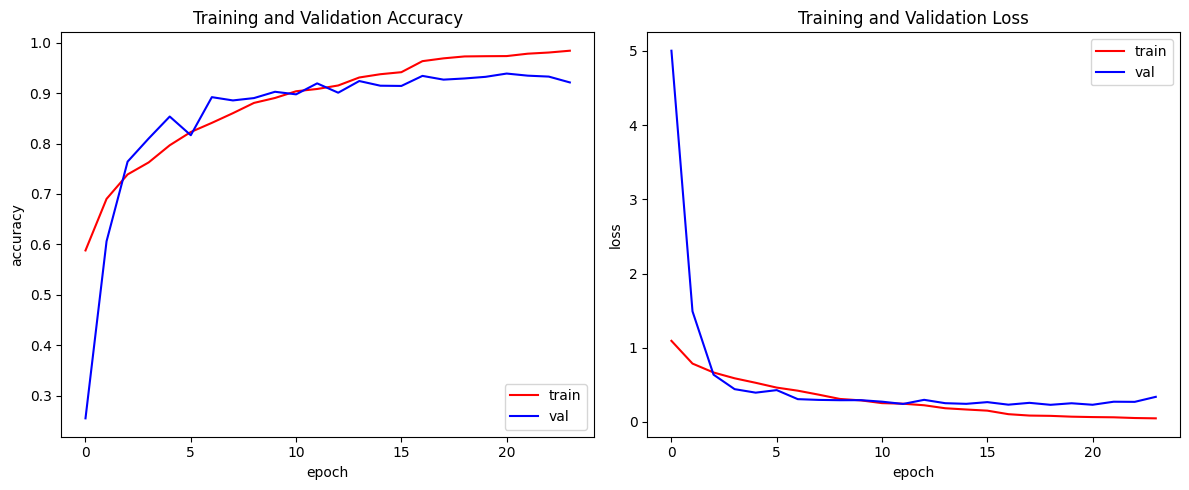

In [ ]:
# model_1 history plot
plot_accuracy_loss(hist)

> Kedua plot di atas mengindikasikan bahwa model memiliki generalisasi yang cukup baik. Pada *accuracy plot* di sebelah kiri, terlihat jarak antara akurasi data *training* dan *validation* tidak terlalu jauh dan terus meningkat serta tidak terdapat fluktuasi yang terlalu signifikan. Begitu pula dengan *loss plot* pada sebelah kanan, di mana nilai *loss* kedua data terus menurun dan jarak diantara keduanya tidak terlalu jauh.


### **Model Evaluation**

In [ ]:
# load the best model from best_model.keras
best_model = load_model('best_model.keras')

# evaluation on validation data
loss, acc = best_model.evaluate(train_gen, verbose=1)

# evaluation on validation data
val_loss, val_acc = best_model.evaluate(validation_gen, verbose=1)

# evaluation on test data
test_loss, test_acc = best_model.evaluate(test_gen, verbose=1)

print(f'Best model train accuracy: {acc:.4f}, loss: {loss:.4f}')
print(f'Best model validation accuracy: {val_acc:.4f}, loss: {val_loss:.4f}')
print(f'Best model test accuracy: {test_acc:.4f}, loss: {test_loss:.4f}')

271/271 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9924 - loss: 0.0256
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9106 - loss: 0.2792
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9039 - loss: 0.3316
Best model train accuracy: 0.9943, loss: 0.0224
Best model validation accuracy: 0.9291, loss: 0.2314
Best model test accuracy: 0.9092, loss: 0.2973


> Model yang telah dilatih mencapai performa yang cukup baik, dengan *training accuracy* sebesar 0.99, *validation accuracy* sebesar 0.93, dan *test accuracy* sebesar 0.91. Hal ini menunjukkan bahwa model mampu menggeneralisasi data dengan baik, baik pada data validasi maupun data uji yang belum pernah dilihat sebelumnya.

              precision    recall  f1-score   support

      glioma     0.9606    0.8993    0.9289       298
  meningioma     0.8311    0.8339    0.8325       301
     notumor     0.9083    0.9550    0.9310       311
   pituitary     0.9418    0.9483    0.9450       290

    accuracy                         0.9092      1200
   macro avg     0.9104    0.9091    0.9094      1200
weighted avg     0.9100    0.9092    0.9092      1200



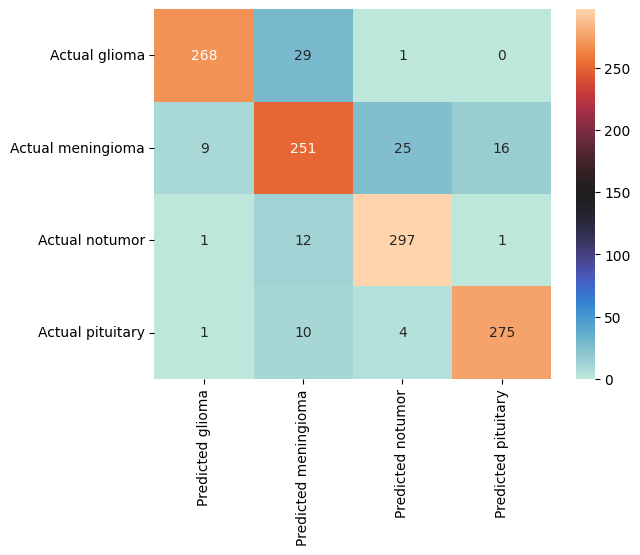

In [ ]:
# classification report and confusion matrix of best model
preds_1, cm_1 = pred_and_eval(best_model, test_gen)

### **Model Conversion**

In [ ]:
# save in SavedModel format
model_save_path = 'saved_model'
tf.saved_model.save(best_model, model_save_path)

# save in Tensorflow.js format
tfjs.converters.save_keras_model(best_model, 'tfjs_model')

# save in Tensorflow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# save labels
labels = ["glioma", "meningioma", "pituitary", "notumor"]
with open('label.txt', 'w') as f:
  f.write('\n'.join(labels))

failed to lookup keras version from the file,
    this is likely a weight only file
Saved artifact at '/tmp/tmp__3sl9br'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139323530830352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139323530833040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139323109894352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139323109894928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139323530835728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139323530836688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139323109898384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139323109895312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139323109898960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1

In [ ]:
# download the folders
!zip -r saved_model.zip saved_model
!zip -r tfjs_model.zip tfjs_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/variables/variables.index (deflated 68%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/saved_model.pb (deflated 88%)
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard2of6.bin (deflated 8%)
  adding: tfjs_model/model.json (deflated 88%)
  adding: tfjs_model/group1-shard5of6.bin (deflated 8%)
  adding: tfjs_model/group1-shard6of6.bin (deflated 8%)
  adding: tfjs_model/group1-shard4of6.bin (deflated 8%)
  adding: tfjs_model/group1-shard3of6.bin (deflated 8%)
  adding: tfjs_model/group1-shard1of6.bin (deflated 8%)


## **Inference**

In [ ]:
# inference using tflite model
def tflite_inference(model_path, folder_path, num_rows=2, num_cols=4):
  # load tflite model
  interpreter = tf.lite.Interpreter(model_path=model_path)
  interpreter.allocate_tensors()

  # input and output details
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  # class labels
  class_labels = list(test_gen.class_indices.keys())

  # get list of image files from image folder
  img_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

  # subplots configuration
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,5))
  fig.subplots_adjust(hspace=0.5)

  for i, img_name in enumerate(img_files[:num_rows*num_cols]): # limit the images that are to be predicted
    img_path = os.path.join(folder_path, img_name)

    # load and preprocess the image
    img = image.load_img(img_path, target_size=(150,150), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0).astype(np.float32)

    # run inference
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    predictions = interpreter.get_tensor(output_details[0]['index'])

    # get predicted class
    pred_class_idx = np.argmax(predictions)
    pred_class = class_labels[pred_class_idx]
    confidence = predictions[0][pred_class_idx] * 100

    # display the image and prediction
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'{img_name}\n{pred_class} ({confidence:.1f}%)', fontsize=10)

  plt.show()

In [ ]:
# create a folder that stores testing images for inference
folder_path = '/content/inference_imgs'
inference_images_folder = os.makedirs(folder_path, exist_ok=True)

uploaded_imgs = files.upload() # upload images to the folder

for filename in uploaded_imgs.keys():
  shutil.move(filename, os.path.join(folder_path, filename))

print(f'Images stored into: {folder_path}')
print(os.listdir(folder_path))

Saving Te-pi_0146.jpg to Te-pi_0146.jpg
Saving Te-no_0400.jpg to Te-no_0400.jpg
Saving Te-no_0365.jpg to Te-no_0365.jpg
Saving Te-me_0298.jpg to Te-me_0298.jpg
Saving Te-me_0276.jpg to Te-me_0276.jpg
Saving Te-me_0232.jpg to Te-me_0232.jpg
Saving Te-gl_0291.jpg to Te-gl_0291.jpg
Saving Te-gl_0271.jpg to Te-gl_0271.jpg
Images stored into: /content/inference_imgs
['Te-me_0232.jpg', 'Te-me_0276.jpg', 'Te-me_0298.jpg', 'Te-pi_0146.jpg', 'Te-gl_0271.jpg', 'Te-no_0365.jpg', 'Te-no_0400.jpg', 'Te-gl_0291.jpg']


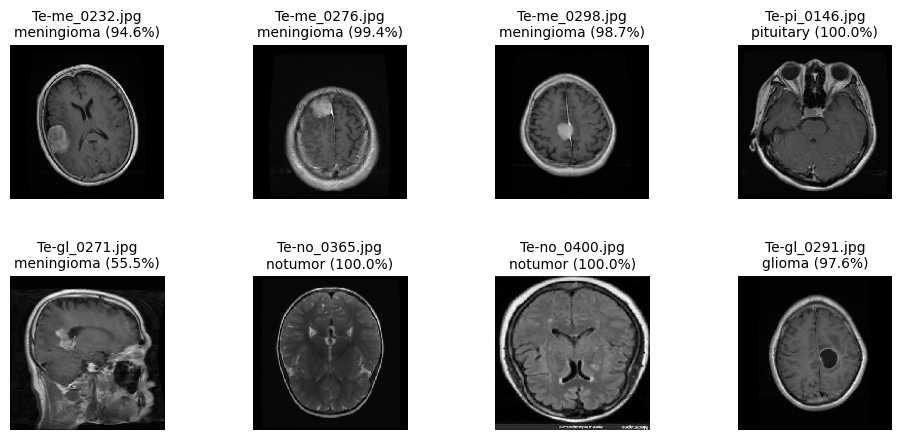

In [ ]:
# function call
tflite_inference('model.tflite', 'inference_imgs')

> Proses inferensi dilakukan menggunakan model yang telah dikonversi ke dalam format TFLite. Pada proses ini, dibuat sebuah direktori baru yang akan menyimpan sejumlah gambar yang diunggah secara manual dari folder `Testing` pada dataset. Dari 8 gambar yang diuji, model berhasil memprediksi 7 gambar dengan benar. Kesalahan prediksi terjadi pada gambar yang tertera pada baris 2 kolom 1, di mana model salah mengklasifikasikan tumor glioma sebagai meningioma. Secara keseluruhan,
hasil ini mengindikasikan bahwa model memiliki performa yang sangat baik dalam mengklasifikan gambar dengan tingkat akurasi yang cukup tinggi.